In [67]:
import pandas as pd

import matplotlib.pyplot as plt

In [68]:
# Read dataset
df = pd.read_csv("Data/1_lebron_james_shot_chart_1_2023.csv")
# df = pd.read_csv("Data/2_james_harden_shot_chart_2023.csv")
# df = pd.read_csv("Data/3_stephen_curry_shot_chart_2023.csv")

In [69]:
print(f"Initial columns: {df.columns.tolist()}\n")

df['score_difference'] = df['lebron_team_score'] - df['opponent_team_score']
# Drop columns
columns_to_drop = [
    "season",
    "color",
    "opponent_team_score",
    "date",
    "qtr",
    # "time_remaining",
    "lebron_team_score",
    "lead",
    "opponent",
    "team",
    # "left",
    # "top",
    "shot_type",
]
df.drop(columns_to_drop, axis=1, inplace=True)

# df = df[df["shot_type"] == 2]

print(f"Final head:\n{df.head()}")

Initial columns: ['top', 'left', 'date', 'qtr', 'time_remaining', 'result', 'shot_type', 'distance_ft', 'lead', 'lebron_team_score', 'opponent_team_score', 'opponent', 'team', 'season', 'color']

Final head:
   top  left time_remaining  result  distance_ft  score_difference
0  310   203          09:26   False           26                 0
1  213   259          08:38   False           16                -1
2  143   171          08:10   False           11                -3
3   68   215          05:24    True            3                -7
4   66   470          01:02   False           23                -1


In [70]:
# convert time to numerical
minutes = df["time_remaining"].str.split(":", expand=True)[0].astype(int)
seconds = df["time_remaining"].str.split(":", expand=True)[1].astype(int)
df["time_remaining"] = minutes * 60 + seconds

print(f"Final head:\n{df.head()}")

Final head:
   top  left  time_remaining  result  distance_ft  score_difference
0  310   203             566   False           26                 0
1  213   259             518   False           16                -1
2  143   171             490   False           11                -3
3   68   215             324    True            3                -7
4   66   470              62   False           23                -1


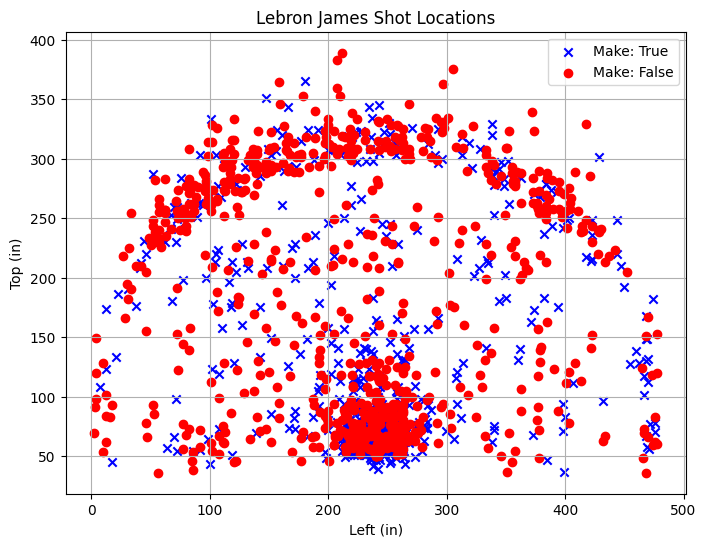

In [71]:
true_points = df[df["result"]] 
false_points = df[~df["result"]]

plt.figure(figsize=(8, 6)) 
plt.scatter(true_points["left"], true_points["top"], marker='x', color='blue', label='Make: True') 
plt.scatter(false_points["left"], false_points["top"], marker='o', color='red', label='Make: False')
plt.xlabel("Left (in)") 
plt.ylabel("Top (in)") # Add legend 
plt.legend() # Display the graph 
plt.title("Lebron James Shot Locations") 
plt.grid(True) 
plt.show() 

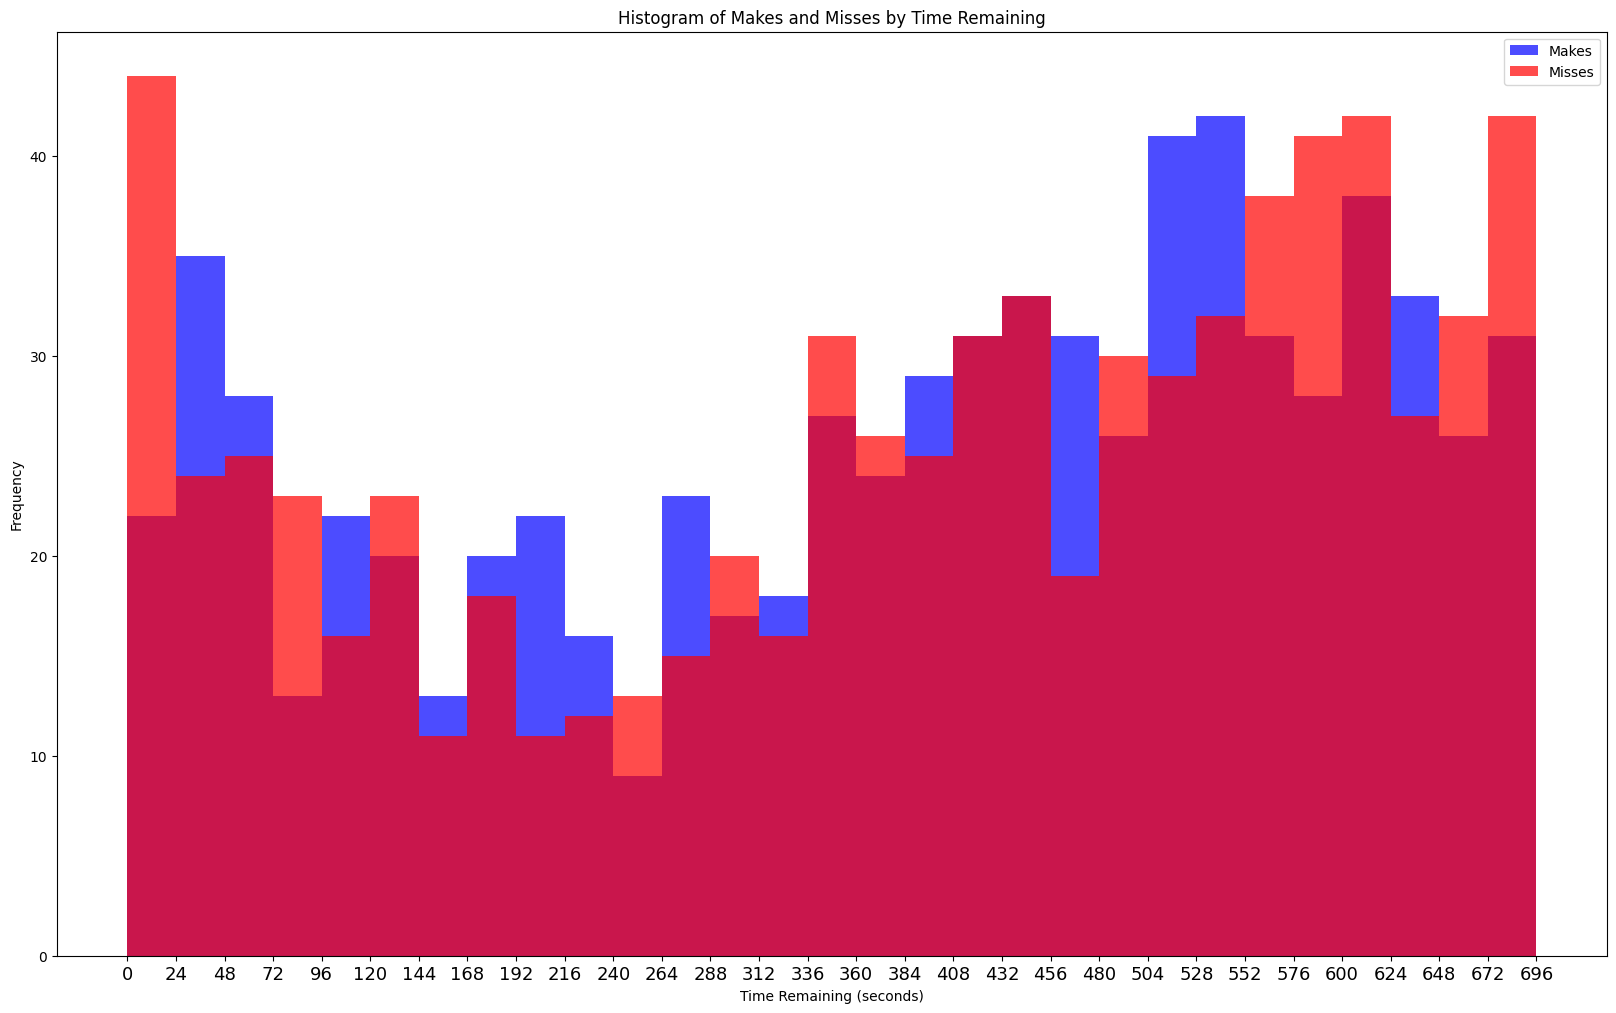

In [79]:
plt.figure(figsize=(20, 12))

true_points = df[df["result"]] 
false_points = df[~df["result"]]

bins = range(0, max(df['time_remaining']), 24)

plt.hist(true_points['time_remaining'], bins=bins, alpha=0.7, label='Makes', color='blue')
plt.hist(false_points['time_remaining'], bins=bins, alpha=0.7, label='Misses', color='red')

plt.xticks(bins, fontsize=13)
# Add labels and title
plt.xlabel('Time Remaining (seconds)')
plt.ylabel('Frequency')
plt.title('Histogram of Makes and Misses by Time Remaining')
plt.legend()

# Display the plot
plt.show()